# **Time analysis**

In [87]:
import pandas as pd
import seaborn as sns
import numpy as np

import os

import data_handling
import plots
import constants

## **Constants**

In [88]:
METRIC_EVALUATION_FOLDER = constants.METRIC_EVALUATION_FOLDER
TIME_RESULTS = os.path.join(METRIC_EVALUATION_FOLDER, 'time_evaluation.csv')

## **Dataset**

In [89]:
df = pd.read_csv(TIME_RESULTS)
df.tail()

,date,model_name,source,target,score_type,score,epoch,parameters
317,2023-07-16 10:38:44.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,5.22511,41,{'valid-script-path': ['/docker/home/marianmt/...
318,2023-07-16 10:44:57.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,23.65720,51,{'valid-script-path': ['/docker/home/marianmt/...
319,2023-07-16 10:47:20.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,4.74517,51,{'valid-script-path': ['/docker/home/marianmt/...
320,2023-07-16 10:53:50.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,24.32900,61,{'valid-script-path': ['/docker/home/marianmt/...
321,2023-07-16 10:56:32.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,4.96839,61,{'valid-script-path': ['/docker/home/marianmt/...


**Add time column**

In [90]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S.%f')

In [97]:
# Calculate duration between each score
df['duration'] = df[(df['score_type'] == 'sacrebleu_corpus_chrf')]['date'].diff().dt.total_seconds()

# Remove first time for each model (as it is being compared with an undefined value)
# for idx, row in df.iterrows():
#     if str(row['epoch'])[-1] in [0,1]:
#         df.loc[idx, 'duration'] = np.nan

# Remove 0 values
# min_threshold = 5
# max_threshold = 500
# df['duration'] = df['duration'].apply(lambda x: x if x > min_threshold else np.nan)
# df['duration'] = df['duration'].apply(lambda x: x if x < max_threshold else np.nan)

df[df['model_name'].str.contains('node21')].head()

,date,model_name,source,target,score_type,score,epoch,parameters,duration
270,2023-07-14 07:45:06.658275,gn_es_july_transformer_cpu_nodenode21_5_ram32.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,5.146746,10,{'train-sets': ['/docker/home/marianmt/artifac...,NaN
271,2023-07-14 07:45:06.658275,gn_es_july_transformer_cpu_nodenode21_5_ram32.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,25.118496,10,{'train-sets': ['/docker/home/marianmt/artifac...,27544.299279
272,2023-07-14 07:51:39.787242,gn_es_july_transformer_cpu_nodenode21_5_ram32.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,5.332844,20,{'train-sets': ['/docker/home/marianmt/artifac...,NaN
273,2023-07-14 07:51:39.787242,gn_es_july_transformer_cpu_nodenode21_5_ram32.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,25.324101,20,{'train-sets': ['/docker/home/marianmt/artifac...,393.128967
274,2023-07-14 07:58:20.285008,gn_es_july_transformer_cpu_nodenode21_5_ram32.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,5.467100,30,{'train-sets': ['/docker/home/marianmt/artifac...,NaN


In [92]:
df[df['model_name'] == 'gn_es_test_by_update_node21.npz'].head()

,date,model_name,source,target,score_type,score,epoch,parameters,duration
310,2023-07-16 10:09:37.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,24.41640,11,{'valid-script-path': ['/docker/home/marianmt/...,171713.0
311,2023-07-16 10:12:18.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,5.20096,11,{'valid-script-path': ['/docker/home/marianmt/...,NaN
312,2023-07-16 10:18:24.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,24.77090,21,{'valid-script-path': ['/docker/home/marianmt/...,527.0
313,2023-07-16 10:20:39.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,5.63263,21,{'valid-script-path': ['/docker/home/marianmt/...,NaN
314,2023-07-16 10:27:13.682896,gn_es_test_by_update_node21.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,24.96930,31,{'valid-script-path': ['/docker/home/marianmt/...,529.0


In [93]:
df.groupby('model_name')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
model_name,,,,,,,,
gn_es_july_transformer_cpu.npz,5.0,111610.453664,224320.972159,468.982696,1201.308381,3281.048265,41400.178655,511700.750322
gn_es_july_transformer_cpu_nodenode20_5_ram32.npz,10.0,20815.914389,64752.769546,326.747979,334.265623,340.844724,347.486180,205105.525675
gn_es_july_transformer_cpu_nodenode21_5_ram32.npz,10.0,3101.062587,8588.483989,368.666289,378.306582,388.478385,393.621567,27544.299279
gn_es_july_transformer_cpu_nodenode21_fp16.npz,10.0,629.169803,974.701057,310.977171,317.123899,320.625193,322.861953,3403.138183
gn_es_july_transformer_cpu_nodenode23.npz,19.0,440.314824,382.375006,298.622040,301.918050,302.799099,307.808595,1870.047735
gn_es_july_transformer_cpu_nodenode23_2.npz,20.0,393.596805,291.325476,291.374117,294.015934,299.656580,304.621792,1245.301885
gn_es_july_transformer_cpu_nodenode23_3.npz,20.0,548.768012,771.211289,277.896649,290.173931,302.440486,308.538922,2803.649056
gn_es_july_transformer_cpu_nodenode23_4.npz,40.0,357.063256,811.694032,2.713969,2.851081,291.285419,303.370632,3763.784515
gn_es_test_by_update_node21.npz,6.0,29061.000000,69884.922677,519.000000,527.500000,531.000000,542.000000,171713.000000


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


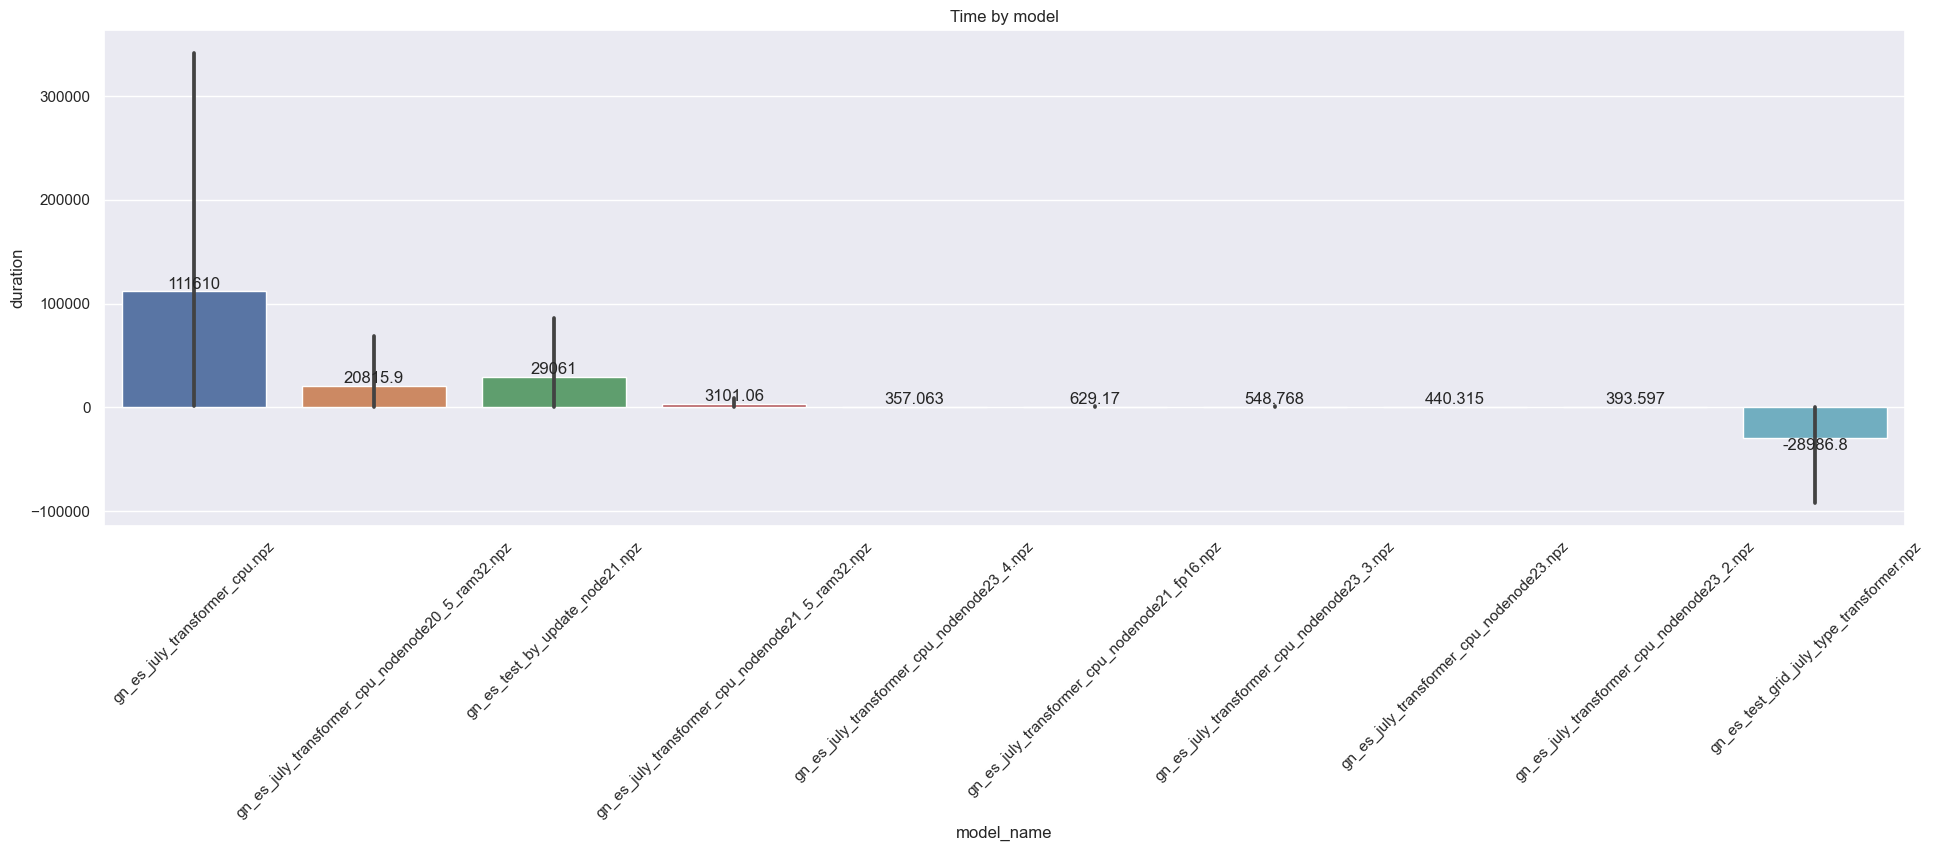

In [94]:
plots.plot_time_by_model(df, title='Time by model')

**Relevant points:**

- **Node 23** appears to be the fastest node. This makes sense as it has **3 GPUs**, while the other nodes have only **2**.
- Adding **fp16** changed **node21** time from **385s** average to **321s**.
- Tweaking configuration such as number of **CPUs**, **RAM** and **Tasks** does not seem to have a significant impact on the time.
- **Node 23** achieved the best time with **9 CPUs**, **60GB RAM** and **4 tasks**.


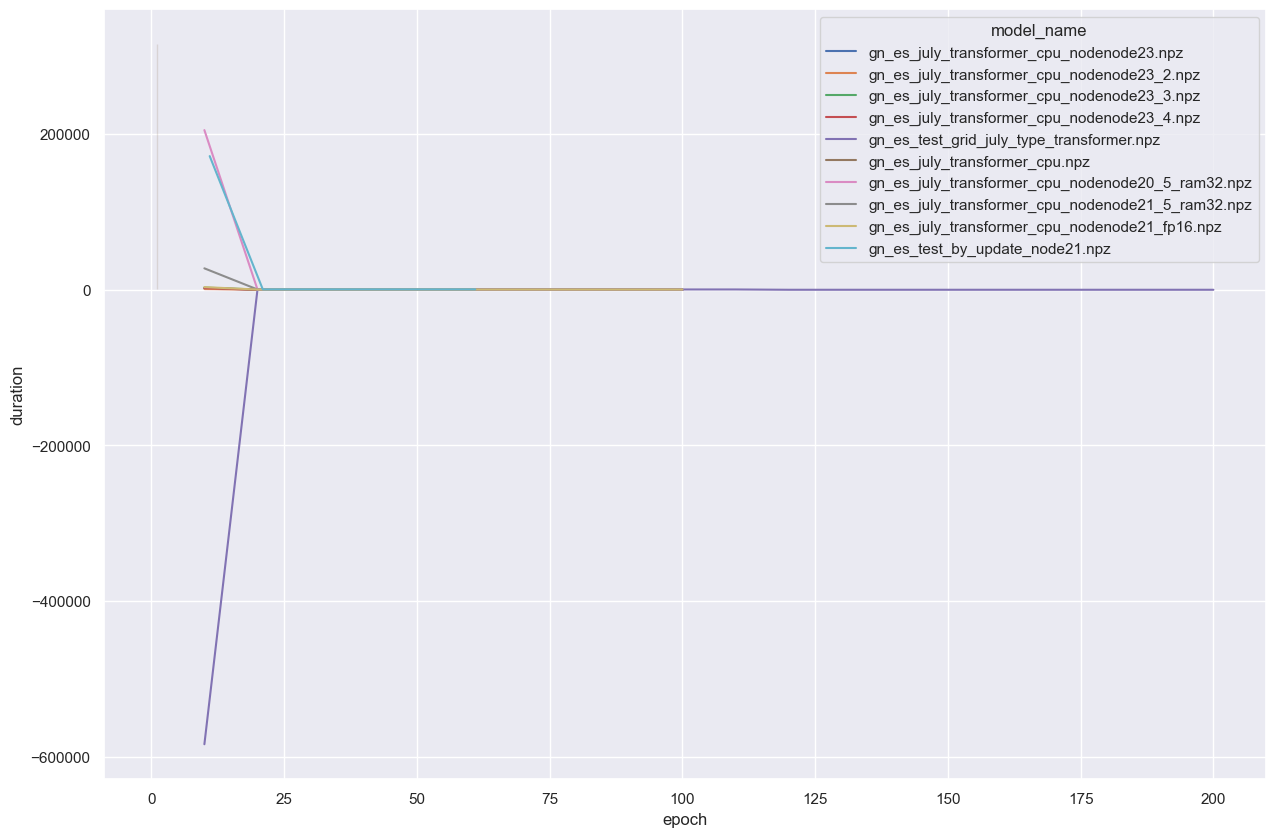

In [95]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x='epoch', y='duration', hue='model_name', data=df[~df['duration'].isna()], ax=ax);

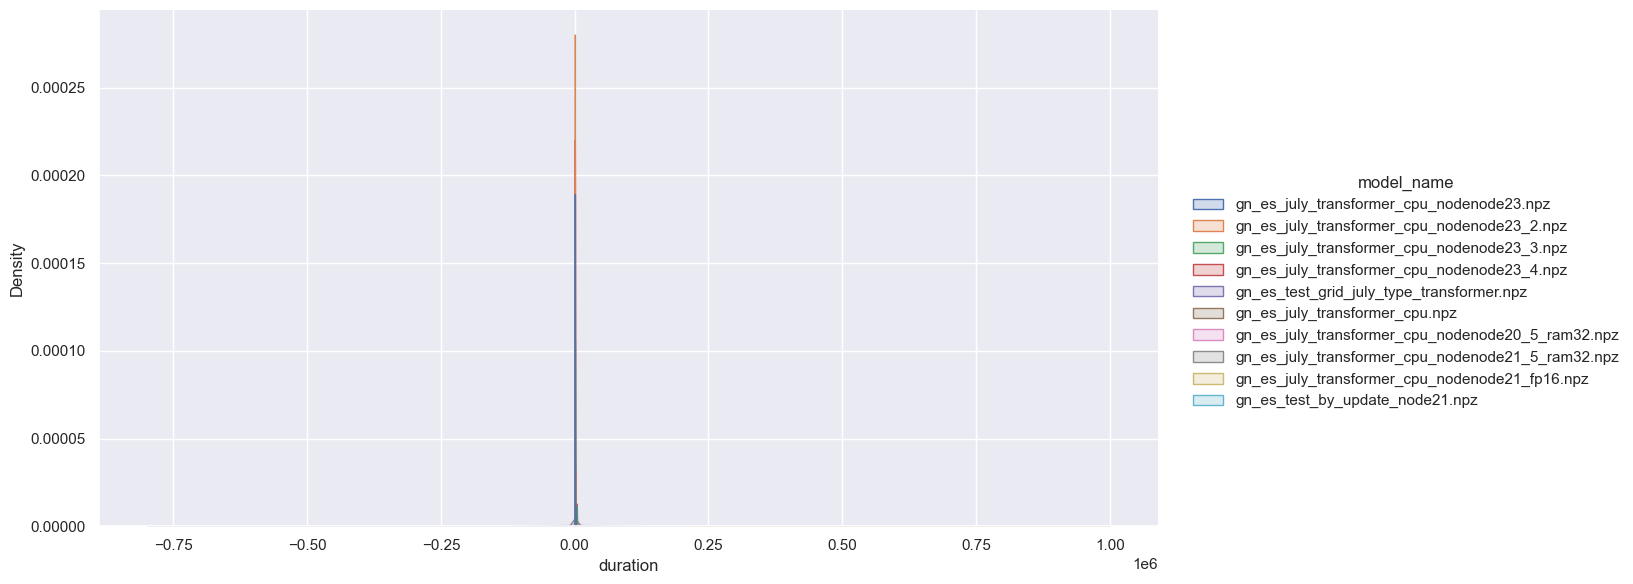

In [96]:
sns.displot(df[~df['duration'].isna()], x='duration', hue='model_name', kind='kde', fill=True, height=6, aspect=2);